In [4]:
# download image from github

!wget -q https://github.com/jingwora/Image-Comparison/blob/main/data/car_diagram/11.brake_base.jpg?raw=true -O 11.brake_base.jpg
!wget -q https://github.com/jingwora/Image-Comparison/blob/main/data/car_diagram/12.brake_senser1.jpg?raw=true -O 12.brake_senser1.jpg
!wget -q https://github.com/jingwora/Image-Comparison/blob/main/data/car_diagram/13.brake_senser2.jpg?raw=true -O 13.brake_senser2.jpg
!wget -q https://github.com/jingwora/Image-Comparison/blob/main/data/car_diagram/14.brake_senser3.jpg?raw=true -O 14.brake_senser3.jpg
!wget -q https://github.com/jingwora/Image-Comparison/blob/main/data/car_diagram/21.wheel_base.jpg?raw=true -O 21.wheel_base.jpg

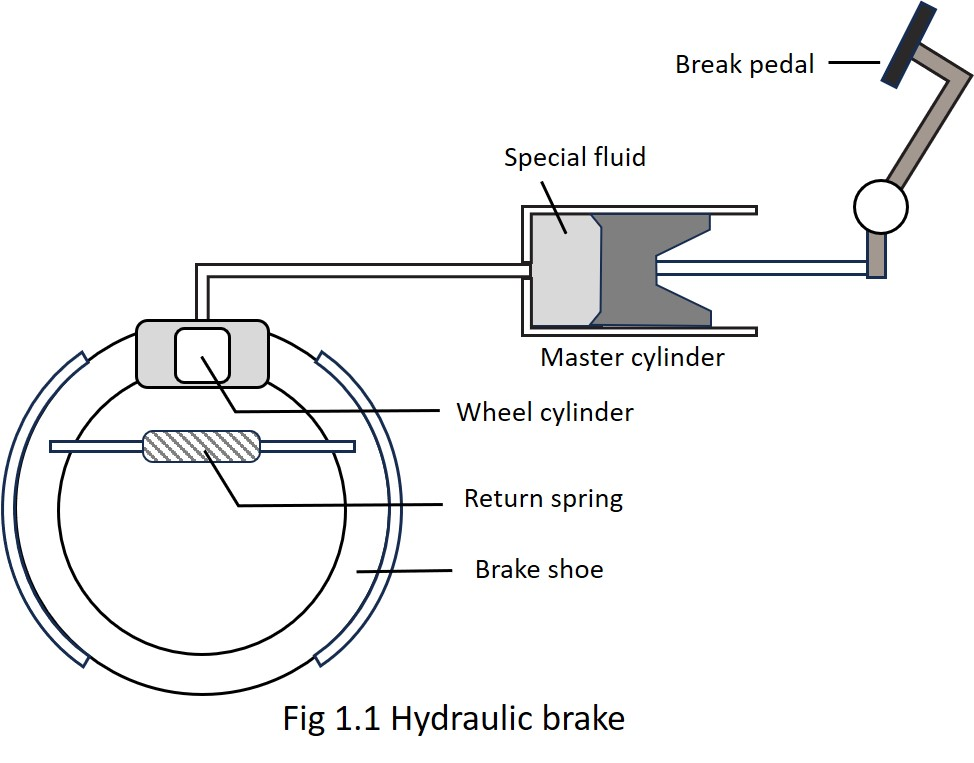

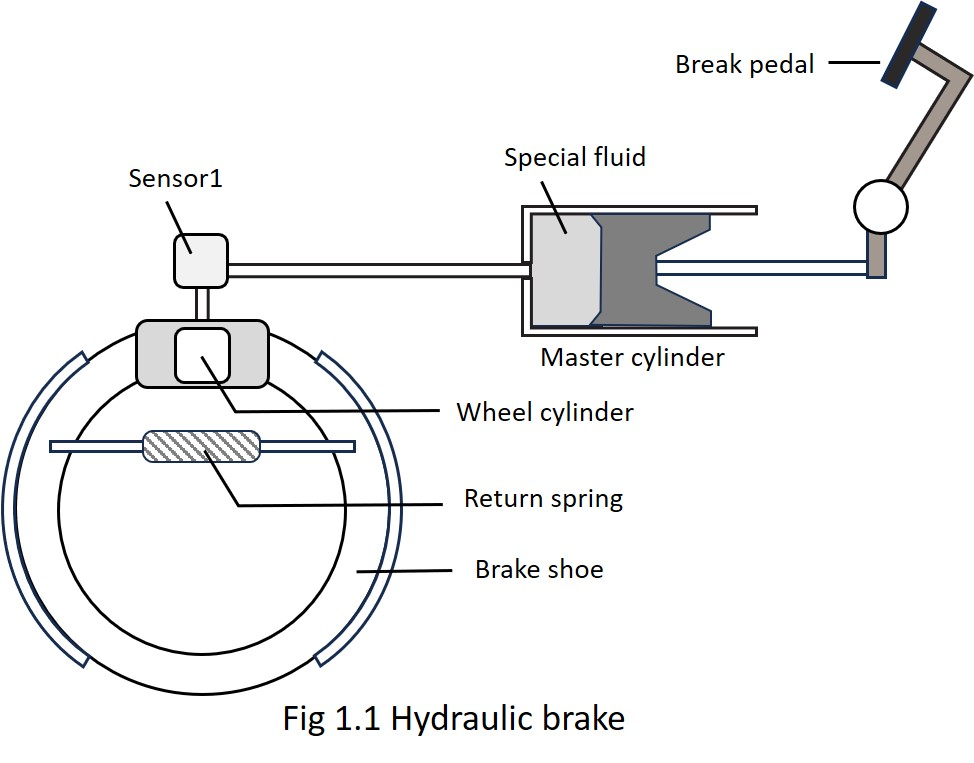

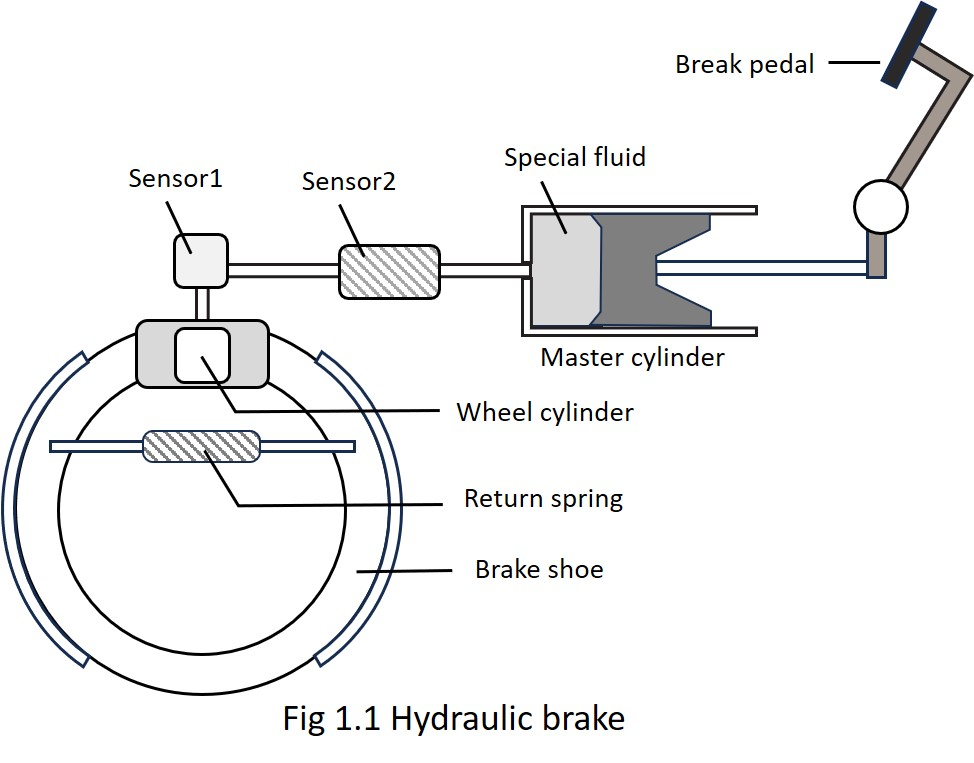

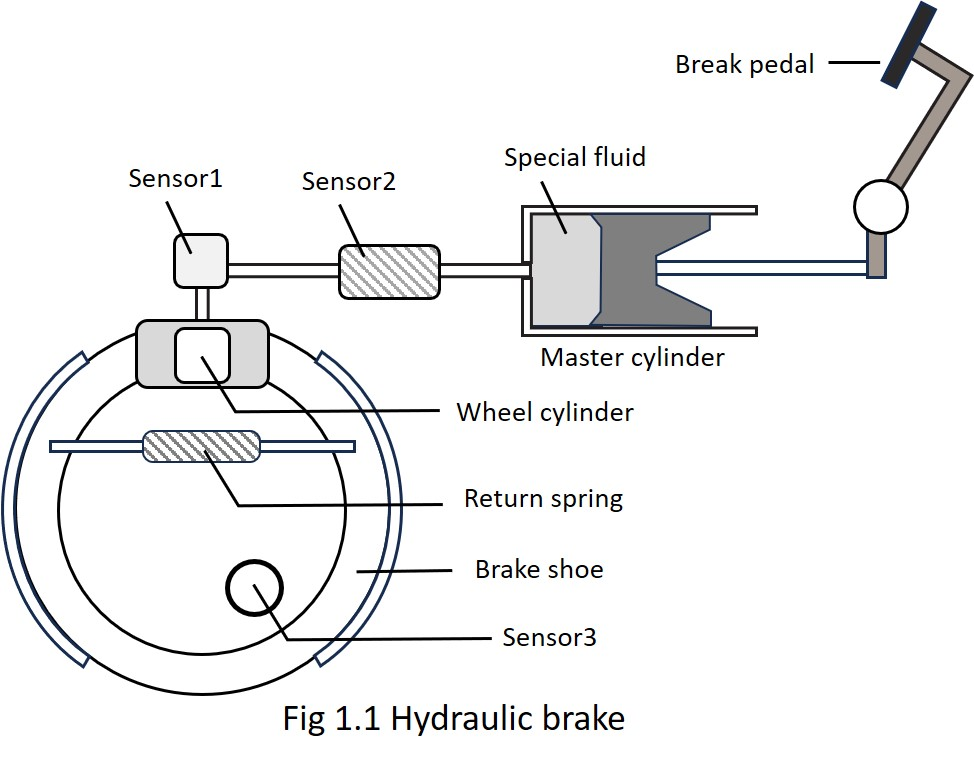

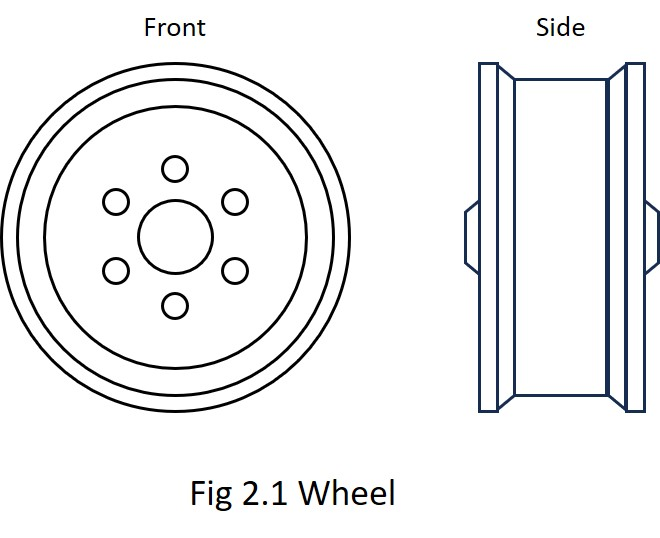

In [7]:
# Display images

from IPython.display import Image, display

# List of image filenames
image_files = [
    '11.brake_base.jpg',
    '12.brake_senser1.jpg',
    '13.brake_senser2.jpg',
    '14.brake_senser3.jpg',
    '21.wheel_base.jpg'
]

# Display each image with reduced size
for image_file in image_files:
  display(Image(filename=image_file, width=500))


## Image similarity


structural_similarity

In [17]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
import numpy as np
import pandas as pd

# Load and resize images to a common dimension
base_image = plt.imread('11.brake_base.jpg')
common_shape = base_image.shape

image_data = []
for image_file in image_files:
  img = plt.imread(image_file)
  img_resized = resize(img, common_shape, anti_aliasing=True)
  similarity = ssim(base_image, img_resized, multichannel=True)
  image_data.append({'image1': '11.brake_base.jpg', 'image2': image_file, 'similarity': similarity})

# Create a DataFrame and sort by similarity
df = pd.DataFrame(image_data)
df_sorted = df.sort_values(by='similarity', ascending=False)

display(df_sorted)

<ipython-input-17-b800d51b2d74>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  similarity = ssim(base_image, img_resized, multichannel=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


,image1,image2,similarity
0,11.brake_base.jpg,11.brake_base.jpg,0.006785
1,11.brake_base.jpg,12.brake_senser1.jpg,0.006772
2,11.brake_base.jpg,13.brake_senser2.jpg,0.006753
3,11.brake_base.jpg,14.brake_senser3.jpg,0.006731
4,11.brake_base.jpg,21.wheel_base.jpg,0.006532
